In [9]:
import shap
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

Load Data

In [ ]:
df = pd.read_csv('LifeExpectancyClean.csv', index_col=0)
df = df.drop(columns=['Country'])

# Identify target variable
X = df.drop(["Life Expectancy"], axis=1)
y = df["Life Expectancy"]    

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 98%|===================| 570/583 [00:25<00:00]        

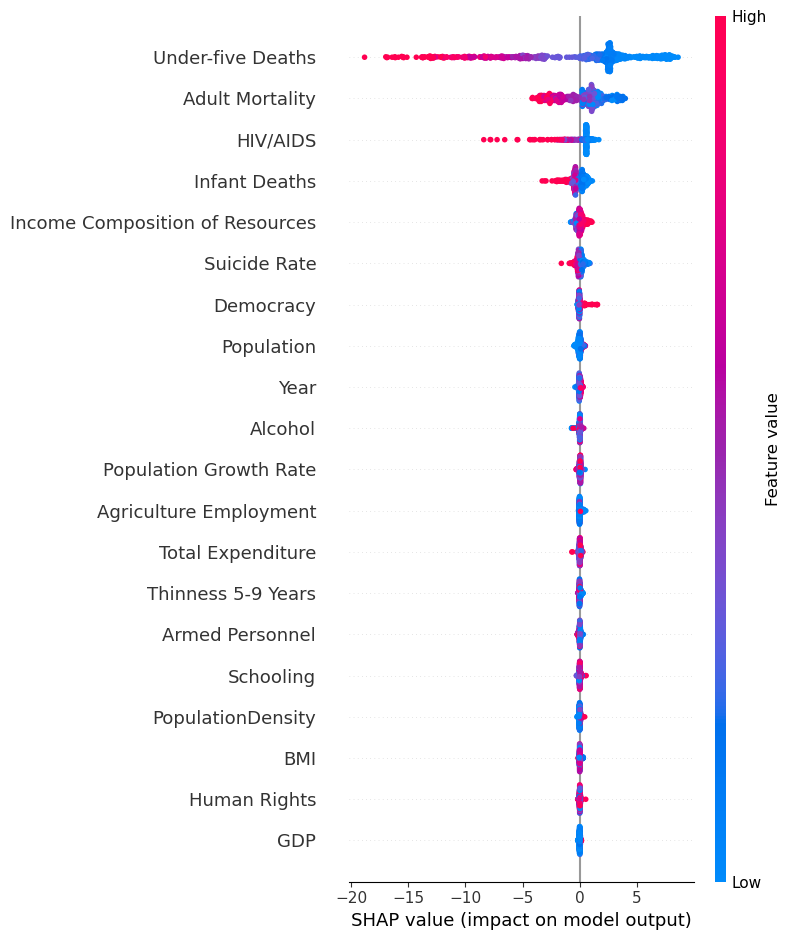

In [ ]:
# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Explain the model predictions using SHAP
explainer = shap.Explainer(model, X_train)  # TreeExplainer for tree-based models
shap_values = explainer(X_test)

# Generate SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=X_train.columns)